# **Generation of Read Pileups**

First, let's download the data for this notebook.

The following commands will download (`wget`) the file `read-pileups.tar.gz` and then unarchive and decompress it (`tar`), resulting in the folder `read-pileups/`.
Then, the folder will be renamed (`mv`) to `data/`, and the now superfluous file `read-pileups.tar.gz` will be removed (`rm`).

In [20]:
! wget http://www.tnt.uni-hannover.de/edu/vorlesungen/AMLG/data/read-pileups.tar.gz
! tar -xzvf read-pileups.tar.gz
! mv -v read-pileups/ data/
! rm -v read-pileups.tar.gz

--2023-11-21 17:13:37--  http://www.tnt.uni-hannover.de/edu/vorlesungen/AMLG/data/read-pileups.tar.gz
Resolving www.tnt.uni-hannover.de (www.tnt.uni-hannover.de)... 130.75.31.71
Connecting to www.tnt.uni-hannover.de (www.tnt.uni-hannover.de)|130.75.31.71|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1446793 (1.4M) [application/x-gzip]
Saving to: ‘read-pileups.tar.gz’

read-pileups.tar.gz 100%[===================>]   1.38M  6.06MB/s    in 0.2s    

2023-11-21 17:13:37 (6.06 MB/s) - ‘read-pileups.tar.gz’ saved [1446793/1446793]

x read-pileups/
x read-pileups/e-coli-dh10b.fasta
read-pileups/ -> data/
read-pileups.tar.gz


In [21]:
import numpy.typing as npt
from typing import Dict, List

# DNA sequencing simulation

By randomly sampling substrings from a larger reference sequence, we can simulate an error-free DNA sequencing process.

##### ❓ **Q1.1** &mdash; Sampling reads from a reference sequence

Complete the function `sample_reads()` to sample `n_reads` reads from the string `reference_sequence` with a minimum/maximum read length of `min_read_len`/`max_read_len`.
A read shall be stored in a dictionary that contains two key-value pairs: the 0-based mapping position of the read on the reference sequence (key `'pos'`) and the read sequence (key `'seq'`).
The function shall hence return a list (of length `n_reads`) of dictionaries.

This is how an example dictionary might look like:

```
{'pos': 4, 'seq': 'TTTCATTCTGACTGCAACGGGCAATA'}
```

In [22]:
import random


def sample_reads(
    reference_sequence: str, n_reads: int, min_read_len: int, max_read_len: int
) -> List[Dict]:
    reads = []

    while len(reads) < n_reads:
        range_acquired = False
        while not range_acquired:
            start_position = random.randrange(len(reference_sequence))
            end_position = random.randrange(len(reference_sequence))
            if start_position > end_position:
                continue
            range_len = end_position - start_position + 1
            if range_len < min_read_len or range_len > max_read_len:
                continue
            range_acquired = True
        read = reference_sequence[start_position : (end_position + 1)]
        reads.append({"pos": start_position, "seq": read})

    return reads

##### ❓ **Q1.2** &mdash; Sampling reads from a reference sequence

Now use the function `sample_reads()` to sample 20 reads from the following reference sequence:

```
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
```

Set the other parameters as follows: `n_reads=20`, `min_read_len=15`, `max_read_len=40`.

In [23]:
reference_sequence = (
    "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"
)

reads = sample_reads(
    reference_sequence=reference_sequence, n_reads=20, min_read_len=15, max_read_len=40
)

print(reads)

[{'pos': 7, 'seq': 'CATTCTGACTGCAACGGGCAATATGTC'}, {'pos': 21, 'seq': 'CGGGCAATATGTCTCTGTGTGGATTAAAAAAAGA'}, {'pos': 18, 'seq': 'CAACGGGCAATATGTCTCTG'}, {'pos': 23, 'seq': 'GGCAATATGTCTCTGTGTGGATT'}, {'pos': 22, 'seq': 'GGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCT'}, {'pos': 23, 'seq': 'GGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTG'}, {'pos': 12, 'seq': 'TGACTGCAACGGGCAATATGTCTCTG'}, {'pos': 10, 'seq': 'TCTGACTGCAACGGGCAATATGTCTCT'}, {'pos': 19, 'seq': 'AACGGGCAATATGTCTCTGTGTGGATTAAAAAA'}, {'pos': 27, 'seq': 'ATATGTCTCTGTGTGGA'}, {'pos': 32, 'seq': 'TCTCTGTGTGGATTAAAAAA'}, {'pos': 2, 'seq': 'CTTTTCATTCTGACTGCAAC'}, {'pos': 13, 'seq': 'GACTGCAACGGGCAATATGTCTCTGTGTGGATTA'}, {'pos': 34, 'seq': 'TCTGTGTGGATTAAAAAAAGAGTG'}, {'pos': 2, 'seq': 'CTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGT'}, {'pos': 17, 'seq': 'GCAACGGGCAATATGTCTCTGTGT'}, {'pos': 0, 'seq': 'AGCTTTTCATTCTGACTGCAACGGGCA'}, {'pos': 0, 'seq': 'AGCTTTTCATTCTGACTGCAACGGGCAATATG'}, {'pos': 1, 'seq': 'GCTTTTCATTCTGACTGCAACGGGCAATATGTCTCT'}, {'pos': 15, 's

##### ❓ **Q1.3** &mdash; Sampling reads from a reference sequence

Now print the reference sequence and all sampled reads such that the reads visually align with the reference sequence.

This is how the printout should look like:

```
Reference: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTG...
Read    0:    TTTTCATTCTGACTGCAACGGGCAA
Read    1:             TGACTGCAACGGGCAATATGTC
```

In [24]:
print(f"Reference: {reference_sequence}")
for i, read in enumerate(reads):
    print(f"Read {i:4}: {' ' * read['pos']}{read['seq']}")

Reference: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
Read    0:        CATTCTGACTGCAACGGGCAATATGTC
Read    1:                      CGGGCAATATGTCTCTGTGTGGATTAAAAAAAGA
Read    2:                   CAACGGGCAATATGTCTCTG
Read    3:                        GGCAATATGTCTCTGTGTGGATT
Read    4:                       GGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCT
Read    5:                        GGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTG
Read    6:             TGACTGCAACGGGCAATATGTCTCTG
Read    7:           TCTGACTGCAACGGGCAATATGTCTCT
Read    8:                    AACGGGCAATATGTCTCTGTGTGGATTAAAAAA
Read    9:                            ATATGTCTCTGTGTGGA
Read   10:                                 TCTCTGTGTGGATTAAAAAA
Read   11:   CTTTTCATTCTGACTGCAAC
Read   12:              GACTGCAACGGGCAATATGTCTCTGTGTGGATTA
Read   13:                                   TCTGTGTGGATTAAAAAAAGAGTG
Read   14:   CTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGT
Read   15:                  GCAACGGGCAATATGTCTCTGTGT
Read

# Pileups, sequencing depth, and coverage

##### ❓ **Q2.1** &mdash; Computing read pileups

Complete the function `compute_pileup_sizes()` and use it to compute the pileup size (i.e., sequencing depth) at each position of the reference sequence.

In [25]:
import numpy as np


def compute_pileup_sizes(
    reference_sequence: str, reads: List[Dict]
) -> npt.NDArray[np.float64]:
    pileup_sizes = np.zeros(shape=len(reference_sequence))

    for read in reads:
        for offset, _ in enumerate(read["seq"]):
            pileup_sizes[read["pos"] + offset] += 1

    return pileup_sizes


pileup_sizes = compute_pileup_sizes(reference_sequence=reference_sequence, reads=reads)

print(pileup_sizes)

[ 2.  3.  5.  5.  5.  5.  5.  6.  6.  6.  7.  7.  8.  9.  9. 10. 10. 11.
 12. 13. 13. 14. 14. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16. 16.
 16. 14. 12. 11. 11. 10. 10. 10.  9.  9.  8.  7.  7.  7.  7.  7.  5.  5.
  5.  3.  3.  3.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


##### ❓ **Q2.2** &mdash; Computing the coverage

Complete the function `coverage()` and use it to compute the coverage (i.e., the average sequencing depth) across all positions of the reference sequence.

In [26]:
def coverage(pileup_sizes: npt.NDArray[np.float64]) -> float:
    return sum(pileup_sizes) / len(pileup_sizes)


print(f"Coverage: {coverage(pileup_sizes=pileup_sizes):.2}")

Coverage: 8.2


##### ❓ **Q2.3** &mdash; Visualizing pileups

Plot the pileups and the coverage using `matplotlib.pyplot.bar()` for the pileups and `matplotlib.pyplot.axhline()` for the coverage.

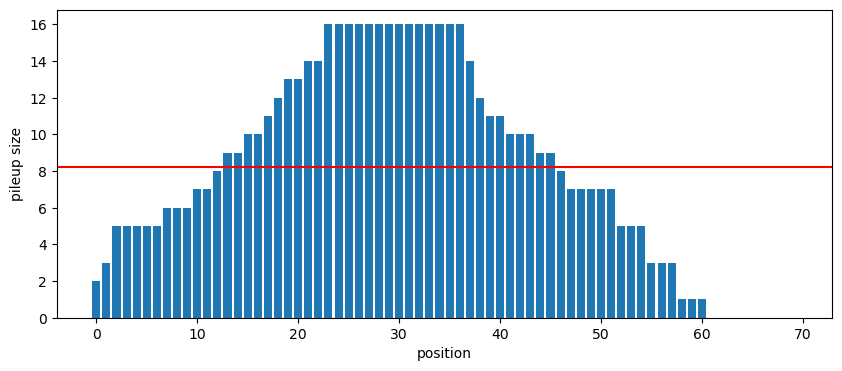

In [27]:
import matplotlib.pyplot as plt


def plot_pileups(
    reference_sequence: str, pileup_sizes: npt.NDArray[np.float64]
) -> None:
    fig = plt.figure(figsize=(10, 4))
    plt.bar(x=range(len(reference_sequence)), height=pileup_sizes)
    plt.axhline(y=coverage(pileup_sizes=pileup_sizes), color="r")
    plt.xlabel("position")
    plt.ylabel("pileup size")
    plt.show()


plot_pileups(reference_sequence=reference_sequence, pileup_sizes=pileup_sizes)

# Simulating the sequencing of an _E. coli_ genome

To provide a more realistic example, we provide the reference genome of _E. coli_ strain DH10B as FASTA file `e-coli-dh10b.fasta` (in the `data/` folder).

> _E. coli_ is a bacterium that is commonly found in the lower intestine of warm-blooded organisms.
> It has a circular DNA molecule approximately 4.6 million base pairs in length, containing more than 4000 protein-coding genes (organized into more than 2500 operons), and several ribosomal RNA (rRNA) operons as well as dozens of transfer RNA (tRNA) genes.

> The [FASTA format](https://en.wikipedia.org/wiki/FASTA_format) is a text-based format for representing either nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes.
>
> The format allows for sequence names and comments to precede the sequences.
> It originated from the [FASTA software package](https://en.wikipedia.org/wiki/FASTA), but has become a de-facto standard.
>
> A sequence begins with a greater-than character (`>`) immediately followed by a description of the sequence (all in a single line).
> The next lines immediately following the description line are the sequence representation, with one letter per amino acid or nucleic acid.
> An example of a multiple sequence FASTA file follows.
>
> ```
> >SEQUENCE_1
> MTEITAAMVKELRESTGAGMMDCKNALSETNGDFDKAVQLLREKGLGKAAKKADRLAAEG
> LVSVKVSDDFTIAAMRPSYLSYEDLDMTFVEN
> >SEQUENCE_2
> SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHSSTINGVKFEEYLKSQI
> ATIGENLVVRRFATLKAGANGVVNGYIHTNGRVGVVIAAACDSAEVASKSRDLLRQICMH
> ```

##### ❓ **Q3.1** &mdash; Reading FASTA files

Complete the function `read_fasta_file()` to read a FASTA file into a dictionary.
In the dictionary, the sequence descriptions are the keys, and the actual sequences are the values.
Use the function to read in `e-coli-dh10b.fasta`.

In [28]:
def read_fasta_file(file_path: str) -> Dict[str, str]:
    with open(file=file_path, mode="r") as file:
        sequences = {}

        # Read the file line by line
        for line in file:
            # Process each line
            line = line.strip()
            if line.startswith(">"):
                current_description = line[1:]
                sequences[current_description] = ""
            else:
                sequences[current_description] += line

        return sequences


ecoli_genome = read_fasta_file(file_path="data/e-coli-dh10b.fasta")
ecoli_genome_sequence = ecoli_genome[
    "NZ_CP110018.1 Escherichia coli strain DH10B chromosome, complete genome"
]

print(f"Read E. coli genome with length {len(ecoli_genome_sequence):,}.")

Read E. coli genome with length 4,687,487.


##### ❓ **Q3.2** &mdash; Visualizing _E. coli_ pileups

Now do the following for the _E. coli_ genome:

1. Truncate the genome to a length of 1000 bases.
2. Sample 1000 reads with a minimum/maximum length of 100/250.
3. Compute the pileup sizes.
4. Plot the pileup sizes and the coverage.

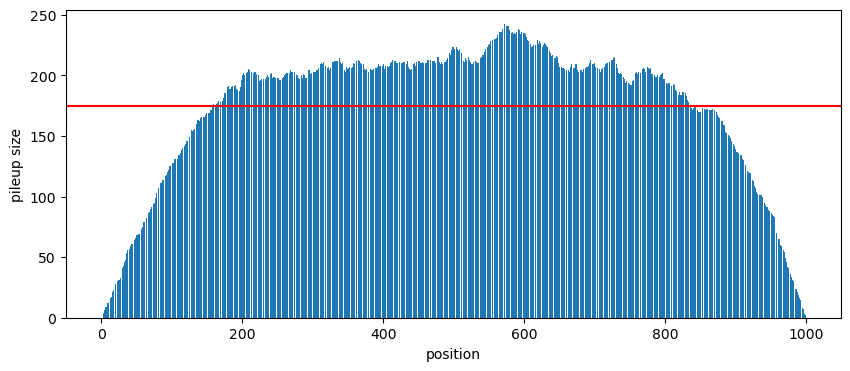

In [29]:
ecoli_genome_sequence_truncated = ecoli_genome_sequence[:1000]

reads = sample_reads(
    reference_sequence=ecoli_genome_sequence_truncated,
    n_reads=1000,
    min_read_len=100,
    max_read_len=250,
)

pileup_sizes = compute_pileup_sizes(
    reference_sequence=ecoli_genome_sequence_truncated, reads=reads
)

plot_pileups(
    reference_sequence=ecoli_genome_sequence_truncated, pileup_sizes=pileup_sizes
)